<a href="https://colab.research.google.com/github/10erick-cpu/Entregas_TP/blob/main/TP6/TP6__Regresi%C3%B3n_Lineal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico VI - Regresión Lineal**

### **Alumno** : Erick Macote Yparraguirre
### **mail** : leonelerick59@gmail.com
### **Profesor** : Ing. Valentin Barcos


# **Librerias Usadas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import statsmodels.api as sm

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings('ignore')

# **Ejercicio**

Elegir uno de entre los siguientes proyectos sugeridos y aplicar regresión
para resolverlo. Cada proyecto tiene datasets de diferentes características
y dificultad (indicada con el semaforito).Para los más sencillos trabajar individualmente y aplicar más de unmétodo de regresión, utilizar diferentes parámetros, compararevaluaciones. Para los más complejos, trabajar en grupos de dos personas y aplicar un único modelo.

Si encuentran algún otro caso de regresión (que no esté totalmente
resuelto) lo pueden proponer para negociarlo con la cátedra.

# **Boston Housing Prices**


El dataset contiene 506 observaciones de 14 variables y precios de venta de propiedades en la ciudad de Boston. El objetivo es conocer la influencia de cada variable y elaborar un modelo que prediga precios de venta.

**Notebook Asociado** :

https://github.com/manlio99/Materia-deaprendizaje/tree/master/3_MidtermProjects/ProjectBHP



# **Dataset a utilizar - Boston Housing Prices**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
df.head(30)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# **Información del Dataset**

El método info() nos proporciona información sobre el DataFrame.

Dicha información contiene el número de columnas, las etiquetas de las columnas, los tipos de datos de las columnas, el uso de la memoria, el índice de rango y el número de celdas en cada columna (valores no nulos).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# **Verificamos si hay valores nulos en el Dataset a analizar**

In [4]:
# La función pandas.isnull devuelve una estructura con las mismas dimensiones que la que se cede como argumento
# sustituyendo cada valor por el booleano 'True' si el correspondiente
# elemento es un valor nulo, y por el booleano 'False' en caso contrario.


# sum() se calcula como True=1 y False=0, puede contar el número de valores faltantes en cada fila y columna llamando a sum() 
# desde el resultado de isnull().


df.isnull().sum()



CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# **Parametros Estadisticos**

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Comentario**

Teniendo en cuenta las variables presentadas , el MEDV ( Median value of owner-occupied homes in $1000's), parece ser la variable target (objetivo), por ende seria  interesante revisar  información estadística sobre esto.


Link StatLib :  http://lib.stat.cmu.edu/datasets/boston

# **Análisis de Distribución normal**

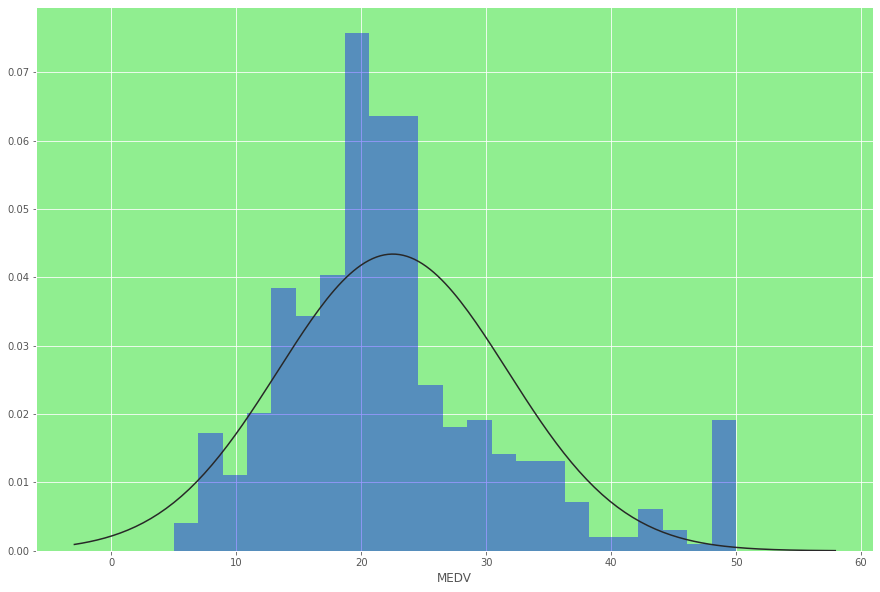

In [6]:
plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_facecolor("lightgreen")


plt.grid(True)

sns.distplot(df['MEDV'], color='blue',fit=norm, kde=False)




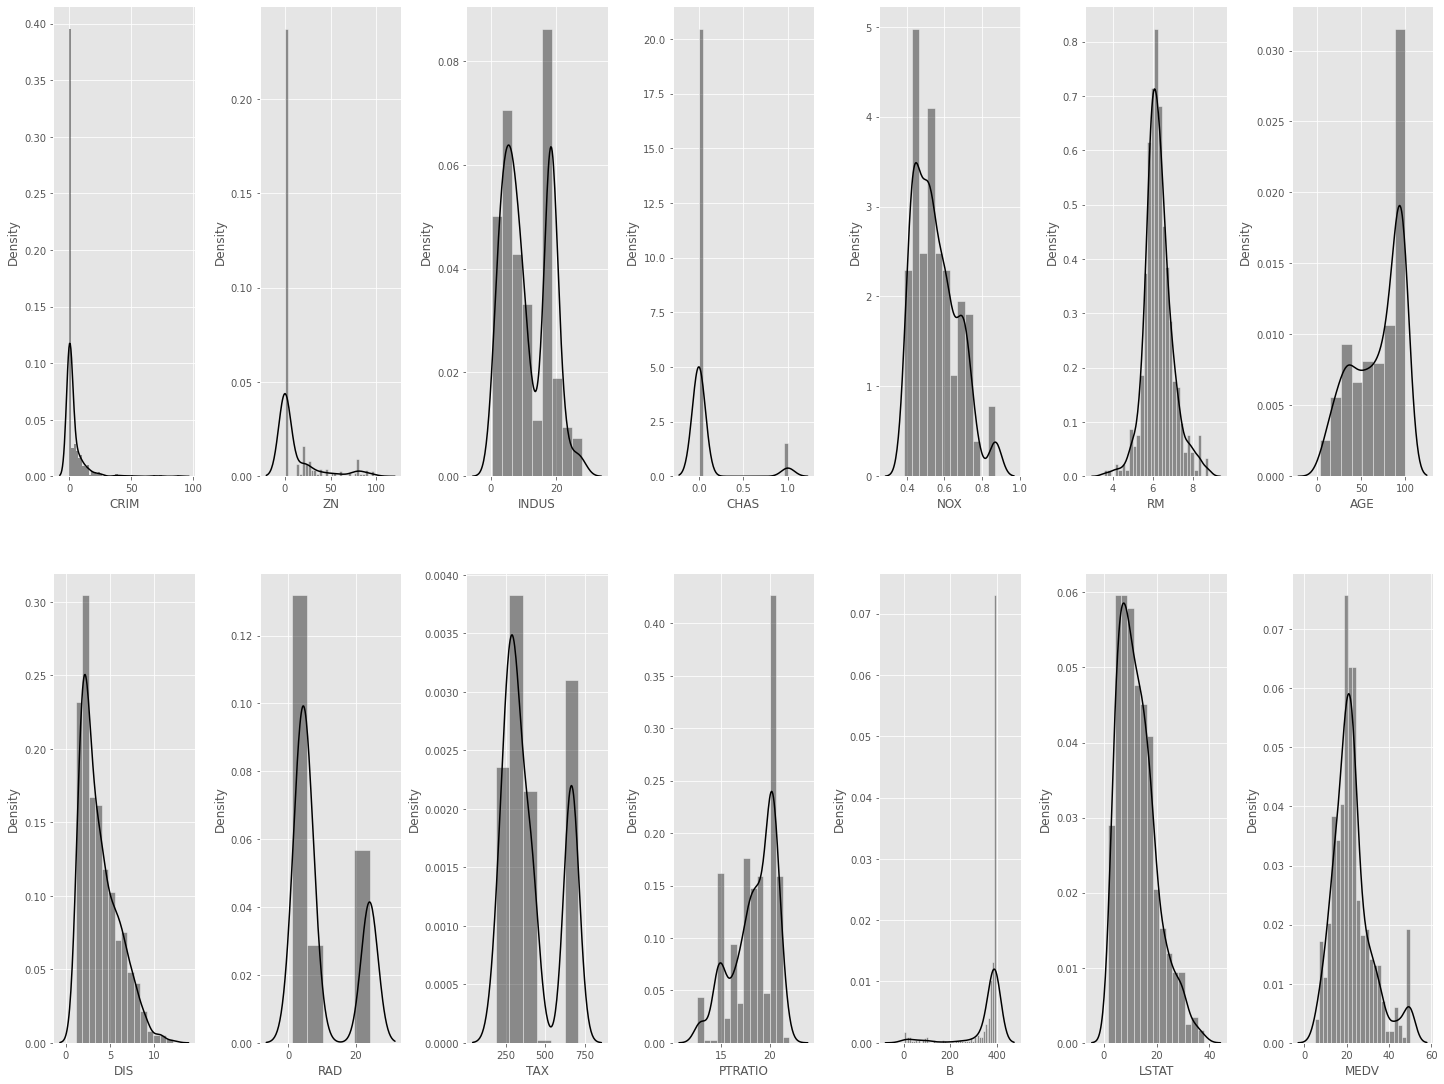

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 15))

index = 0
axs = axs.flatten()

for k,v in df.items():
    sns.distplot(v, ax=axs[index],color='black')
    
    sns.set_theme(style='darkgrid')
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)




# **Análisis de Correlación**


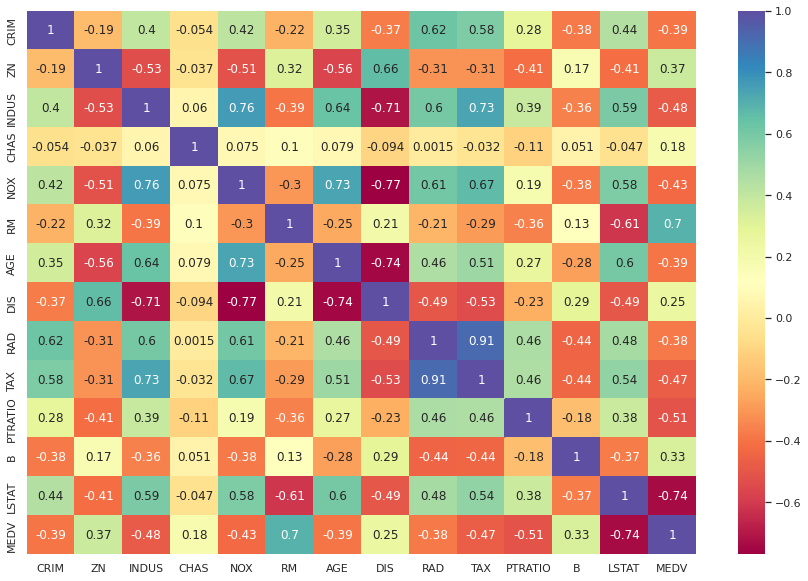

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cmap = 'Spectral')


# **Análisis de valores atípicos (Outliers)**

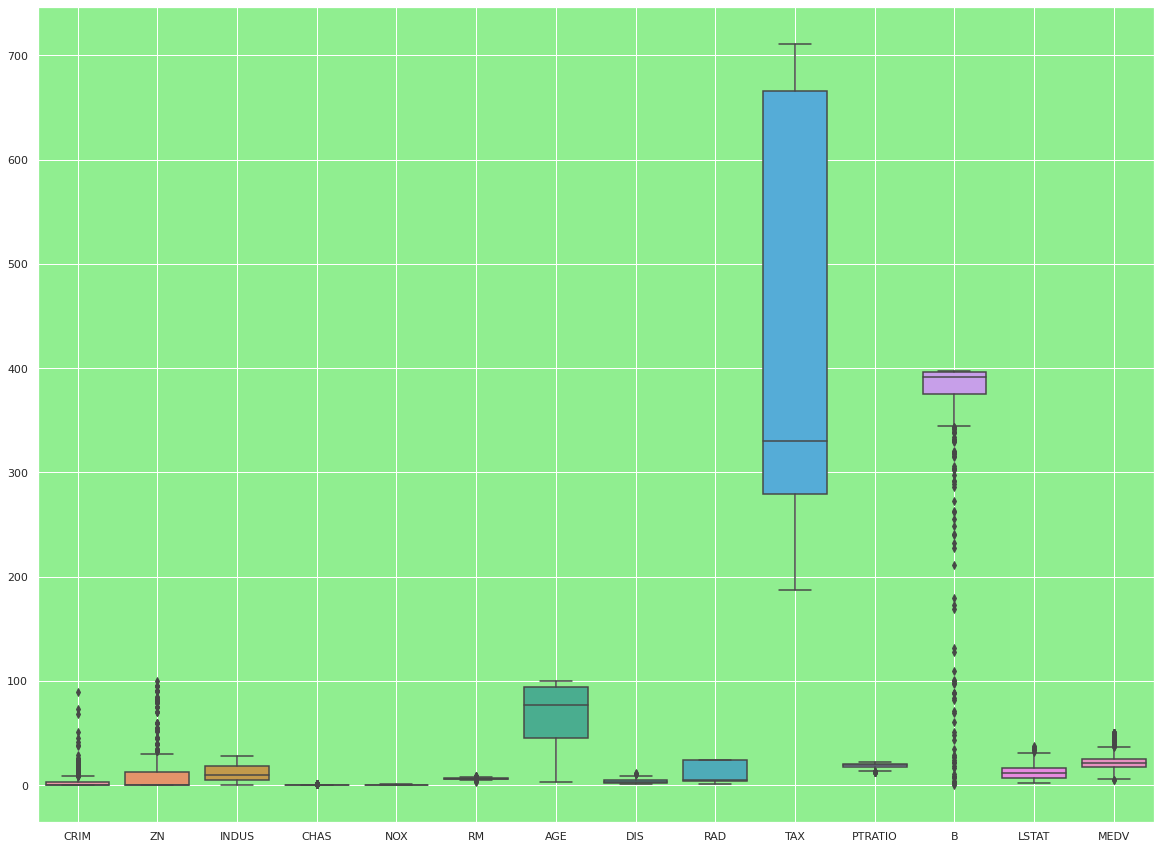

In [9]:
plt.figure(figsize=(20,15))

ax = plt.axes()
ax.set_facecolor("lightgreen")


sns.boxplot(data = df)
plt.grid(True)

# **Comentario**

#### Del grafico resultante, se puede corrobar las siguientes suposiciones:

##### 1.  El target (MEDV)  parece seguir una  distribución normal, sin embargo, presenta algunos valores atípicos (Outliers).


##### 2.  Observando la última fila (análisis de correlación) del mapa de calor, pdoemos apreciar que las variables LSTAT (% Lower status of the population :  -0.74) y RM (average number of rooms per dwelling : 0.7) tienen una fuerte correlación con MEDV.

##### 3. Del diagrama boxplot se puede evidenciar que el dataset tiene algunos valores atípicos (outliers) en la mayoría de las variables (features), en las que podría realizarse un proceso de estandarización.

##### 4. RAD (index of accessibility to radial highways) y TAX(full-value property-tax rate per $10,000) están altamente correlacionados, lo cual es un indicio para descartar algunas de estas dos variables (features).


##### 5. CRIM (per capita crime rate by town), ZN(proportion of residential land zoned for lots over 25,000 sq.ft.) y B(1000(Bk - 0.63)^2 donde Bk ( proportion of blacks by town) presentan un gran distribucion asimetrica.


In [10]:
df.drop(columns = 'RAD', axis = 1, inplace = True)

In [11]:
df_new = df[np.isfinite(df).all(1)]

# view updated DataFrame

df_new.head(30)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,311,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,311,15.2,390.50,15.71,21.7


## **Escalamiento de datos** 

Es importante eliminar valores atípicos (outliers) en los datos y trabajar a una misma escala.

In [12]:
X = df_new.drop(columns = 'MEDV', axis = 1)
y = df_new['MEDV']



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Regresión**


In [13]:
test_size1 = 0.3 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size1, random_state = 0)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 275 datos para entrenamiento y 119 datos para prueba


# **Modelo de Regresion Lineal**

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7854037612134118

In [15]:
lr.score(X_test, y_test)

0.6681746410277005

In [16]:
y_pred = lr.predict(X_test)

      
print('MSE:{}'.format(round(mean_squared_error(y_test,y_pred),4)))
      
print('RMSE:{}'.format(round(np.sqrt(mean_squared_error(y_test,y_pred)),4)))

print('r2:{}'.format(round(r2_score(y_test,y_pred),4)))


MSE:25.3487
RMSE:5.0347
r2:0.6682


## **Influencia de cada variable en el precio del inmueble**

In [17]:
coef = pd.Series(data=np.round(lr.coef_,2),index = X.columns)
coef.sort_values(ascending=False)

RM         3.51
ZN         0.99
CHAS       0.95
B          0.76
INDUS     -0.34
TAX       -0.34
CRIM      -0.40
AGE       -0.95
PTRATIO   -1.69
NOX       -1.95
LSTAT     -2.32
DIS       -3.27
dtype: float64

# **Comentario**

Las variables que dan mayor valor a la vivienda son : RM, ZN, CHAS, B,
teniendo mayor valor el número de habitaciones, el resto de las variables reducen el precio del inmueble

###### Los coeficientes LSTAT y RM tienen una fuerte influencia en el comportamiento del modelo, en el que LSTAT tiene una influencia negativa y, por otro lado, RM tiene una influencia positiva.


###### Tiene sentido, porque cuantas más habitaciones, más cara tiende a ser una casa, y cuanto menor es el estatus de la población en esa región, menor suele ser el precio de la casa. 

###### Además, podemos ver que DIS también tiene una fuerte influencia en el modelo, sin embargo, no parece tener sentido, porque cuanto más cerca esté la casa de los centros de empleo en Boston, más caro sería, y como podemos ver, DIS tiene una influencia negativa.






## **Lasso Regression**

In [18]:
lasso_cv = LassoCV(cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)
alpha = lasso_cv.alpha_


print('alpha:{}'.format(round(alpha,4)))

alpha:0.1049


In [19]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.10487561812667796)

In [20]:
lasso.score(X_train, y_train)

0.7830530352796812

In [21]:
lasso.score(X_test, y_test)

0.671566503610686

## **Regression accuracy metrics**

In [22]:
cv = 2 
max_iter = 78000 
lasso_cv = LassoCV(cv = cv, max_iter = max_iter)
lasso_cv.fit(X_train, y_train)
alpha = lasso_cv.alpha_
lasso = Lasso(alpha = lasso_cv.alpha_)
ls = lasso.fit(X_train, y_train)
print('Precisión entrenamiento: {}'.format(lasso.score(X_train, y_train)))
print('Precisión prueba: {}'.format(lasso.score(X_test, y_test)))
y_pred = ls.predict(X_test)

      
print('MSE:{}'.format(round(mean_squared_error(y_test,y_pred),4)))
      
print('RMSE:{}'.format(round(np.sqrt(mean_squared_error(y_test,y_pred)),4)))

print('r2:{}'.format(round(r2_score(y_test,y_pred),4)))

Precisión entrenamiento: 0.7836255926688087
Precisión prueba: 0.6714981367613853
MSE:25.0948
RMSE:5.0095
r2:0.6715


## **Ridge Regression**

In [23]:
alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)
alpha = ridge_cv.alpha_
alpha

0.07866591612548213

In [24]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.07866591612548213)

In [25]:
ridge.score(X_train, y_train)

0.7854036779900238

In [26]:
ridge.score(X_test, y_test)

0.6682119643336837

# **Regression accuracy metrics**

In [27]:
cv = 2 
alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = cv, normalize = True)
ridge_cv.fit(X_train, y_train)
alpha = ridge_cv.alpha_
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

print('Precisión entrenamiento: {}'.format(ridge.score(X_train, y_train)))
print('Precisión prueba: {}'.format(ridge.score(X_test, y_test)))
y_pred = ls.predict(X_test)



print('MSE:{}'.format(round(mean_squared_error(y_test,y_pred),4)))
      
print('RMSE:{}'.format(round(np.sqrt(mean_squared_error(y_test,y_pred)),4)))

print('r2:{}'.format(round(r2_score(y_test,y_pred),4)))



Precisión entrenamiento: 0.7854010701171908
Precisión prueba: 0.6683835694686397
MSE:25.0948
RMSE:5.0095
r2:0.6715


# **Elastic Net**

In [28]:
elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
elastic_net_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, max_iter=100000, normalize=True)

In [29]:
alpha = elastic_net_cv.alpha_
alpha

0.0008457025405153812

In [30]:
elastic_net_cv.l1_ratio

0.5

In [31]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.0008457025405153812)

In [32]:
elastic_net.score(X_train, y_train)

0.785403396264881

In [33]:
elastic_net.score(X_test, y_test)

0.6682573970115819

# **Regression accuracy metrics**

In [34]:

cv = 3 
max_iter = 78000 

elastic_net_cv = ElasticNetCV(alphas = None, cv = 2, max_iter = max_iter, normalize = True)
elastic_net_cv.fit(X_train, y_train)
alpha = elastic_net_cv.alpha_
elastic_net_cv.l1_ratio
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

print('Precisión entrenamiento: {}'.format(elastic_net.score(X_train, y_train)))
print('Precisión prueba: {}'.format(elastic_net.score(X_test, y_test)))
y_pred = elastic_net.predict(X_test)


print('MSE:{}'.format(round(mean_squared_error(y_test,y_pred),4)))
      
print('RMSE:{}'.format(round(np.sqrt(mean_squared_error(y_test,y_pred)),4)))

print('r2:{}'.format(round(r2_score(y_test,y_pred),4)))


Precisión entrenamiento: 0.7854029184764765
Precisión prueba: 0.6682997946407373
MSE:25.3391
RMSE:5.0338
r2:0.6683


# **Normalizacion de Datos - Analisis del modelo propuesto**

In [35]:
X_nor = df_new.drop(columns = 'MEDV', axis = 1)
y_nor = df_new['MEDV']

df_nor = normalize(X_nor)
df_nor = pd.DataFrame(df_nor, columns = X_nor.columns)
df_nor.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,0.005179,0.023002,0.018521,0.000126,0.000987,0.011533,0.121525,0.007286,0.688694,0.033539,0.661477,0.022082
std,0.012472,0.048017,0.010539,0.000475,0.000180,0.002703,0.048003,0.004573,0.150842,0.006073,0.207454,0.011369
min,0.000013,0.000000,0.000963,0.000000,0.000660,0.004684,0.006432,0.001451,0.426005,0.024238,0.003846,0.003100
25%,0.000163,0.000000,0.010493,0.000000,0.000876,0.009482,0.087836,0.003338,0.575566,0.027318,0.507318,0.013682
50%,0.000515,0.000000,0.016870,0.000000,0.000984,0.011813,0.126341,0.006411,0.652827,0.033869,0.744084,0.020334
75%,0.004966,0.024399,0.023822,0.000000,0.001058,0.013372,0.156882,0.010658,0.851140,0.038444,0.806037,0.028334
max,0.113134,0.207655,0.059424,0.002282,0.002053,0.018157,0.237637,0.027625,0.993149,0.053100,0.890631,0.070067


In [36]:

X_train, X_test, y_train, y_test = train_test_split(df_nor, y_nor, test_size = 0.3, random_state = 0)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 275 datos para entrenamiento y 119 datos para prueba


In [37]:

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7961834927265649

In [38]:
lr.score(X_test, y_test)

0.6894193076624109

In [39]:
y_pred = lr.predict(X_test)


print('MSE:{}'.format(round(mean_squared_error(y_test,y_pred),4)))
      
print('RMSE:{}'.format(round(np.sqrt(mean_squared_error(y_test,y_pred)),4)))

print('r2:{}'.format(round(r2_score(y_test,y_pred),4)))



MSE:23.7258
RMSE:4.8709
r2:0.6894


# **Comentario**


* Las variables que dan mayor valor a la vivienda son : RM, ZN, CHAS, B,
teniendo mayor valor el número de habitaciones, el resto de las variables reducen el precio del inmueble


* Los coeficientes LSTAT y RM tienen una fuerte influencia en el comportamiento del modelo, en el que LSTAT tiene una influencia negativa y, por otro lado, RM tiene una influencia positiva. Tiene sentido, porque cuantas más habitaciones, más cara tiende a ser una casa, y cuanto menor es el estatus de la población en esa región, menor suele ser el precio de la casa. 

* Además, podemos ver que DIS también tiene una fuerte influencia en el modelo, sin embargo, no parece tener sentido, porque cuanto más cerca esté la casa de los centros de empleo en Boston, más caro sería, y como podemos ver, DIS tiene una influencia negativa.


* Cada método de regresión  es evaluado considerando diferentes parámetros.
Considerando los resultados obtenidos, existe una gran tendencia de ciertas variables que influye en el precio de una vivienda, (RM) y (ZN); la variable que influye en la reducción del precio del inmueble es (LSTAT)

* Finalmente, se puede concluir que  los métodos probados tiende a las siguientes metricas 

* **MSE**  : 25.0948
* **RMSE** : 5.0095
* **r2**   : 0.6715